In [69]:
import pandas as pd
import numpy as np
import dtale
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, jaccard_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, normalize
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import dtale
import random
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [2]:
profiles = pd.read_csv("H:\My Documents\profiles-dating-app\profiles.csv")

profiles['sex'] = profiles.sex.replace({'m': 1, 'f': 0})

profiles['essays'] = profiles['essay0'] + profiles['essay1'] + profiles['essay2'] + profiles['essay3'] + profiles['essay4'] + profiles['essay5'] + profiles['essay6'] + profiles['essay7'] + profiles['essay8'] + profiles['essay9']
profiles.essays.fillna('None')
profiles.drop(['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9'],axis = 1, inplace = True)

profiles.height.fillna(np.mean(profiles.height), inplace= True)
profiles.income.fillna(np.mean(profiles.income), inplace= True)
#profiles.sign_num.fillna(statistics.mode(profiles.sign_num), inplace= True)
#df.fillna("Unknown",inplace = True)
profiles.height = profiles.height.astype('int64')
#profiles.sign_num = profiles.sign_num.astype('int64')
profiles.income = profiles.income.astype('int64')

print('Total rows:',profiles.shape[0])
print('Total columns:',profiles.shape[1])
# print('breakdown of column types:')
# print(profiles.dtypes.value_counts())
profiles['speaks'].fillna('0',inplace = True)
profiles['speaks'] = profiles.speaks.str.count(",") + 1

print(len(profiles.select_dtypes('int64').columns),'numerical columns(integer):',list(profiles.select_dtypes('int64').columns))
print(len(profiles.select_dtypes('float64').columns),'numerical columns(float):',list(profiles.select_dtypes('float64').columns))
print(len(profiles.select_dtypes('object').columns),'categorical columns:',list(profiles.select_dtypes('object').columns))


Total rows: 59946
Total columns: 22
5 numerical columns(integer): ['age', 'height', 'income', 'sex', 'speaks']
0 numerical columns(float): []
17 categorical columns: ['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sign', 'smokes', 'status', 'essays']


In [3]:
i = 0
l1 = list()
l2 = list()

for artist_sent in profiles.index:

    l1.append(TextBlob(str(profiles.iloc[i]['essays'])).sentiment.polarity)
    l2.append(TextBlob(str(profiles.iloc[i]['essays'])).sentiment.subjectivity)
    
    i += 1
profiles['polarity'] = l1
profiles['subjectivity'] = l2

In [4]:
profiles.drop('essays', axis = 1 , inplace = True)

In [5]:
profiles['sign_new'] = profiles.sign.str.split(' ').str.get(0)

sign_dict = dict(
{'leo':0,
'gemini':1,
'libra':2,
'cancer':3,
'virgo':4,
'taurus':5,
'scorpio':6,
'aries':7,
'pisces':8,
'sagittarius':9,
'aquarius':10,
'capricorn':11,})
#profiles['sign_num'] = profiles['sign_new'].map(sign_dict)
profiles.drop('sign', axis = 1, inplace = True)

In [6]:
profiles.drop('sign_new',axis = 1, inplace = True)
profiles.drop('last_online',axis = 1, inplace = True)
profiles.drop('income',axis = 1, inplace = True)
profiles.drop('location',axis = 1, inplace = True)

In [9]:
profiles.body_type.fillna(statistics.mode(profiles.body_type), inplace = True)
profiles.diet.fillna('mostly anything', inplace = True)
profiles.drinks.fillna(statistics.mode(profiles.drinks), inplace = True)
profiles.drugs.fillna(statistics.mode(profiles.drugs), inplace = True)
profiles.education.fillna(statistics.mode(profiles.education), inplace = True)
profiles.ethnicity.fillna(statistics.mode(profiles.ethnicity), inplace = True)
profiles.job.fillna('other', inplace = True)
profiles.pets.fillna('likes dogs and likes cats', inplace = True)
profiles.religion.fillna('other', inplace = True)
#profiles.sign.fillna(statistics.mode(profiles.sign), inplace = True)
profiles.smokes.fillna(statistics.mode(profiles.smokes), inplace = True)
profiles.offspring.fillna('doesn&rsquo;t have kids', inplace = True)
#profiles.sign_new.fillna(lambda x: random.choice(df[df[sign_new] != np.nan]["sign_new"]), inplace =True)

# Find a match

In [70]:
categories = profiles.select_dtypes('object')
numerics = profiles.select_dtypes('int64')
profiles_ohe = pd.get_dummies(categories, drop_first=True)
profiles_ohe = profiles_ohe.join(numerics)
values, norms = normalize(profiles_ohe, norm='l1', return_norm=True)
#transformer = pd.DataFrame(transformer)
profiles_ohe = pd.DataFrame(data= values, columns = profiles_ohe.columns)
profiles_ohe

,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,...,smokes_when drinking,smokes_yes,status_married,status_seeing someone,status_single,status_unknown,age,height,sex,speaks
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.009091,0.0,0.200000,0.681818,0.009091,0.009091
1,0.000000,0.008264,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.008264,0.0,0.289256,0.578512,0.008264,0.024793
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.008475,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.322034,0.576271,0.008475,0.025424
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.009259,...,0.0,0.0,0.0,0.0,0.009259,0.0,0.212963,0.657407,0.009259,0.018519
4,0.009434,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.009434,0.0,0.273585,0.622642,0.009434,0.009434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,0.000000,0.007519,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.007519,0.0,0.443609,0.466165,0.000000,0.007519
59942,0.000000,0.000000,0.0,0.009259,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.009259,0.0,0.222222,0.666667,0.009259,0.009259
59943,0.000000,0.008065,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.008065,0.0,0.338710,0.572581,0.008065,0.008065
59944,0.008403,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.008403,0.0,0.226891,0.613445,0.008403,0.042017


In [71]:
#import scipy

#ary = scipy.spatial.distance.cdist(profiles_ohe, profiles_ohe, metric='euclidean')
#profiles_ohe[ary==ary.min()]
jaccard_score(profiles_ohe.iloc[100].values, profiles_ohe.iloc[500].values, average = 'macro')

ValueError: continuous is not supported

In [28]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [56]:
def find_match(user_id):
    res_max = 0
    idx = 0
    for i in range(len(profiles)):
        if i != user_id:
            res = jaccard_score(profiles_ohe.iloc[user_id].values, profiles_ohe.iloc[i].values, average = 'macro')
            if res > res_max:
                res_max = res
                idx = i

    return idx, res

In [57]:
find_match(200)

(18564, 0.21393810148731407)

In [62]:
profiles.iloc[(profiles.index == 200) | (profiles.index == 18564)]

,age,body_type,diet,drinks,drugs,education,ethnicity,height,job,offspring,orientation,pets,religion,sex,smokes,speaks,status,polarity,subjectivity
200,27,fit,anything,socially,never,graduated from college/university,asian,65,medicine / health,doesn&rsquo;t have kids,bisexual,likes dogs and likes cats,catholicism,0,no,1,single,0.0,0.0
18564,27,fit,mostly vegetarian,socially,never,graduated from college/university,white,65,other,doesn&rsquo;t have kids,bisexual,likes dogs and likes cats,other,0,no,1,single,0.0,0.0


# Predict gender

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

def missing_values_table(df):
    mis_val=df.isnull().sum()    
    mis_val_perc=100*df.isnull().sum()/len(df)
    mis_val_table=pd.concat([mis_val, mis_val_perc], axis=1) 
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("Your selected data frame has " + str(df.shape[1]) + " columns.\n"+"There are " + str(mis_val_table_ren_columns.shape[0]) +
 " columns that have missing values.")
    return mis_val_table_ren_columns

miss = missing_values_table(profiles)
miss.head(14)

Your selected data frame has 19 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


90% of people answered essay 0, followed by essay 1 (usually just things you do)
Obviously, 65% of people answered essay 8. (usually private thoughts, self-critic)

In [174]:
#inspect non-essay questions
objects = profiles.select_dtypes('object').nunique().sort_values(ascending=False).reset_index()
numerics = profiles.select_dtypes('int64')
non_essay = [i for i in list(objects['index']) if not 'essay' in i]
profiles[non_essay].nunique()
# summary

ethnicity      217
religion        45
education       32
job             21
diet            18
pets            15
offspring       15
body_type       12
drinks           6
status           5
smokes           5
orientation      3
drugs            3
dtype: int64

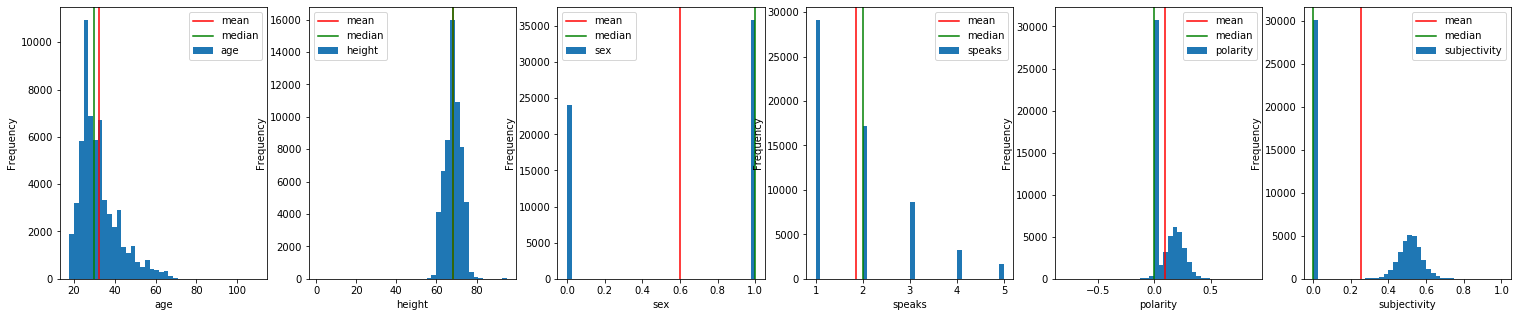

In [175]:
#plot numeric data
plt.figure(figsize=[26,5])
k=1
for i in list(numeric.columns):
    plt.subplot(1,len(list(numeric.columns)),k)
    plt.hist(numeric[i], bins=40,label=i)
    plt.axvline(x=numeric[i].mean(),color='red',label='mean')
    plt.axvline(x=numeric[i].median(),color='green',label='median')
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.legend()
    k+=1
plt.show()

drinks ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
smokes ['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']
drugs ['never' 'sometimes' nan 'often']


c:\users\mcoskun\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,drinks,smokes,drugs
count,56961.000000,54434.000000,45866.000000
mean,1.904865,0.426700,0.186456
std,0.706802,0.977735,0.411791
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
max,5.000000,4.000000,2.000000


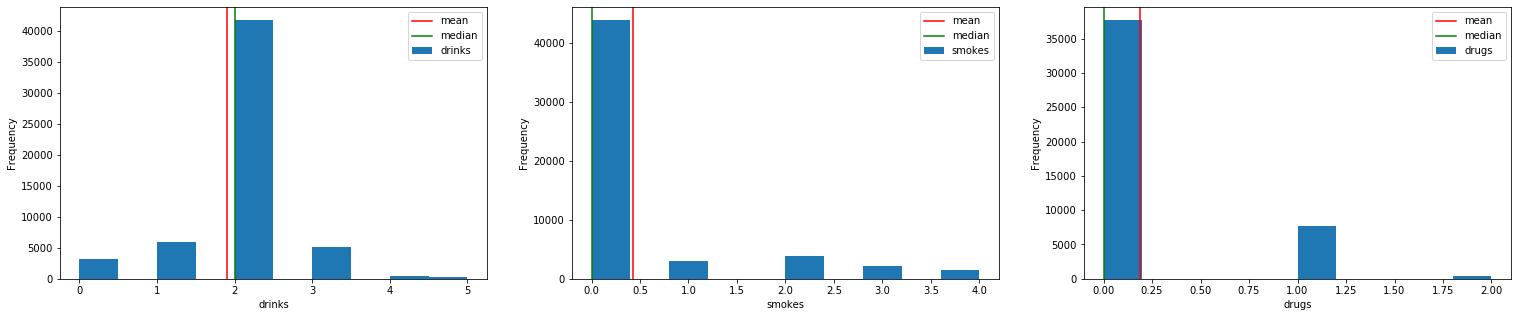

In [21]:
x_col = ['sign_num','drinks','smokes','drugs'] + list(objects[objects['index'].str.contains('essay')]['index'])
zodiac = profiles[x_col]
for i in ['drinks','smokes','drugs']:
    print(i,zodiac[i].unique())
    
zodiac.drugs = zodiac.drugs.map({'never':0,'sometimes':1,'often':2})
zodiac.smokes = zodiac.smokes.map({'no':0,'when drinking':1,'sometimes':2,'yes':3,'trying to quit':4})
zodiac.drinks = zodiac.drinks.map({'not at all':0,'rarely':1,'socially':2,'often':3,'very often':4,'desperately':5})

display(zodiac[['drinks','smokes','drugs']].describe())
#plot numeric data
plt.figure(figsize=[26,5])
k=1
for i in ['drinks','smokes','drugs']:
    plt.subplot(1,3,k)
    plt.hist(zodiac[i],label=i)
    plt.axvline(x=zodiac[i].mean(),color='red',label='mean')
    plt.axvline(x=zodiac[i].median(),color='green',label='median')
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.legend()
    k+=1
plt.show()

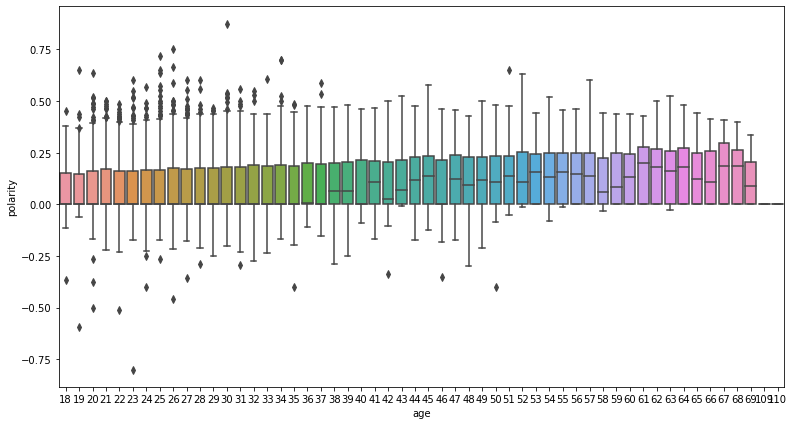

In [180]:
#age and positivity correlation
x = profiles['age']
y = profiles['polarity']
plt.figure(figsize=[13,7])
sns.boxplot(x,y)

In [193]:

X = profiles.drop('sex',axis =1)
y = profiles.sex

categorical_var = np.where((X.dtypes != 'float'))[0]
#categorical_var =[ 1,  2 , 3 , 4 , 5 , 6,  9 ,10 ,11 ,12 ,13, 14 ,15 ,16, 17, 18 ,19]
print('\nCategorical Variables indices : ',categorical_var)

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.80, random_state=101)


Categorical Variables indices :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [198]:
model = CatBoostClassifier(iterations=20, depth=16, learning_rate=0.25, loss_function='CrossEntropy')

# fit the model with the training data
model.fit(train_x,train_y,cat_features = categorical_var,plot=False)
print('\n Model Trainied')

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

0:	learn: 0.5694531	total: 275ms	remaining: 5.23s
1:	learn: 0.4951653	total: 304ms	remaining: 2.73s
2:	learn: 0.4454295	total: 354ms	remaining: 2s
3:	learn: 0.4097997	total: 2.71s	remaining: 10.9s
4:	learn: 0.3810478	total: 5.29s	remaining: 15.9s
5:	learn: 0.3611974	total: 9.17s	remaining: 21.4s
6:	learn: 0.3475739	total: 11.9s	remaining: 22.1s
7:	learn: 0.3368008	total: 14.2s	remaining: 21.3s
8:	learn: 0.3282746	total: 16.7s	remaining: 20.4s
9:	learn: 0.3212970	total: 19s	remaining: 19s
10:	learn: 0.3152084	total: 21.2s	remaining: 17.4s
11:	learn: 0.3058978	total: 23.6s	remaining: 15.7s
12:	learn: 0.2984364	total: 26s	remaining: 14s
13:	learn: 0.2923844	total: 28.2s	remaining: 12.1s
14:	learn: 0.2863894	total: 30.7s	remaining: 10.2s
15:	learn: 0.2813859	total: 33.1s	remaining: 8.28s
16:	learn: 0.2766849	total: 36.6s	remaining: 6.46s
17:	learn: 0.2725588	total: 41s	remaining: 4.55s
18:	learn: 0.2684274	total: 44.4s	remaining: 2.34s
19:	learn: 0.2648066	total: 47.3s	remaining: 0us

 Mod